In [22]:
import pandas as pd
import random
from pprint import pprint
from DecisionTree import decision_tree_algorithm, make_predictions, calculate_accuracy, predict_example
from DataHandler import generate_data, create_plot, train_test_split
from Pruning import post_pruning

In [2]:
# PassengerId: định danh
# Survived: trạng thái sống/chết  0 = chết, 1 = sống
# Pclass: hạng ghế  1 = hạng nhất, 2 = hạng hai, 3 = hạng ba
# Name: tên
# Sex: giới
# Age: tuổi
# SibSp: số lượng anh/chị em ruột hoặc vợ/chồng đi cùng
# Parch: số lượng bố/mẹ hoặc con cái đi cùng
# Ticket: số vé
# Fare: giá vé
# Cabin: số hiệu của cabin
# Embarked: cảng lên tàu  C = Cherbourg, Q = Queenstown, S = Southampton
df = pd.read_csv("Titanic.csv")
df["label"] = df.Survived
df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)

#xử lí missing value
#gán giá trị trung bình
median_age = df.Age.median()
#gán giá tị xuất hiện nhiều nhất
mode_embarked = df.Embarked.mode()[0]
df = df.fillna({"Age": median_age, "Embarked": mode_embarked})
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [3]:
metrics = {"max_depth": [], "acc_tree": [], "acc_tree_pruned": []}
for n in range(10, 26):
    df_train, df_test = train_test_split(df, test_size=0.15)
    df_train, df_val = train_test_split(df_train, test_size=0.15)

    tree = decision_tree_algorithm(df_train, ml_task="classification", max_depth=n)
    tree_pruned = post_pruning(tree, df_train, df_val, ml_task="classification")

    metrics["max_depth"].append(n)
    metrics["acc_tree"].append(calculate_accuracy(df_test, tree))
    metrics["acc_tree_pruned"].append(calculate_accuracy(df_test, tree_pruned))

df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index("max_depth")

<Axes: xlabel='max_depth'>

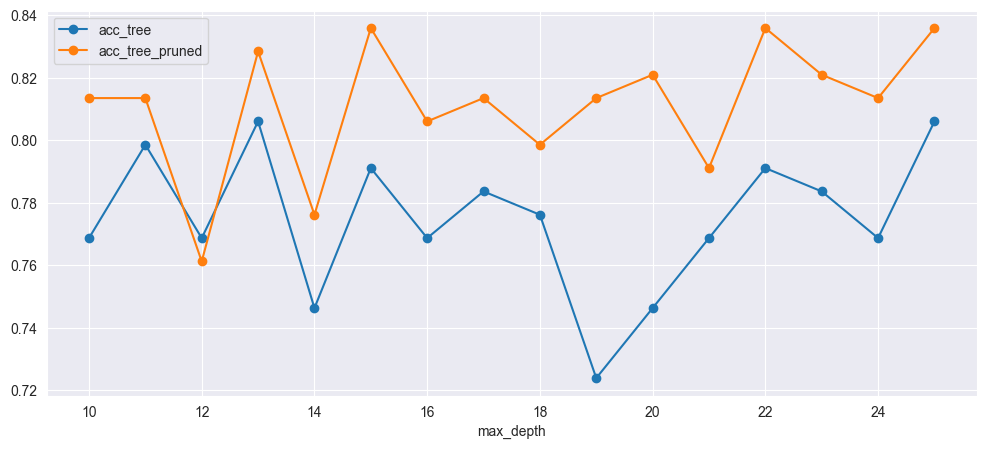

In [4]:
df_metrics.plot(figsize=(12, 5), marker="o")

In [61]:
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis = 1)
df = df.rename(columns={"species": "label"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
#seed(0): không thay đổi kết quả khi random
random.seed(0)
train_df, test_df = train_test_split(df, 20)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [63]:
example = test_df.iloc[0]
example

sepal_length                5.1
sepal_width                 2.5
petal_length                3.0
petal_width                 1.1
label           Iris-versicolor
Name: 98, dtype: object

In [66]:
predict_example(example, tree)

'Iris-versicolor'

In [65]:
tree = decision_tree_algorithm(train_df, ml_task='classification',max_depth=3)

In [67]:
make_predictions(test_df, tree)
calculate_accuracy(test_df,tree)

0.95

In [111]:
# đọc dữ liệu từ tệp và đưa chúng vào dataframe
df = pd.read_csv("adult.data", header=None)
# đặt tên cho các cột
# Age: tuổi
# Workclass: loại công việc
# Fnlwgt: số lượng người đại diện
# Education: trình độ học vấn
# Education-num: số năm học
# Marital-status: tình trạng hôn nhân
# Occupation: nghề nghiệp
# Relationship: mối quan hệ gia đình
# Race: chủng tộc
# Sex: giới tính
# Capital-gain: lợi nhuận từ việc bán tài sản
# Capital-loss: tổn thất từ việc bán tài sản
# Hours-per-week: số giờ làm việc mỗi tuần
# Native-country: quốc gia 
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df = df.drop(['fnlwgt'], axis=1)
df = df.drop(['education', 'native_country', ], axis=1)
df['income'] = df['income'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)
df = df.rename(columns={"income": "label"})
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,label
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [113]:
#xóa các giá trị null
df.replace(' ?', pd.NaT, inplace=True)
df.isnull().sum()
df = df.dropna()
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,label
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,1106.037079,88.910216,40.949313,0.249040
std,13.118227,2.562469,7497.863364,405.657203,11.985382,0.432464
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [114]:
df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
label              int64
dtype: object

In [115]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoder sắp xếp các giá trị chuỗi mà mã hóa thành số tăng dần
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])

In [116]:
df.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
label             int64
dtype: object

In [117]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
0,39,5,13,4,0,1,4,1,2174,0,40,0
1,50,4,13,2,3,0,4,1,0,0,13,0
2,38,2,9,0,5,1,4,1,0,0,40,0
3,53,2,7,2,5,0,2,1,0,0,40,0
4,28,2,13,2,9,5,2,0,0,0,40,0


In [74]:
df_10k = df.head(1000)
df_10k.describe()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,38.042000,2.21200,10.186000,2.619000,6.236000,1.464000,3.680000,0.681000,586.200000,98.713000,40.65800,0.245000
std,12.899094,0.91755,2.504331,1.498026,3.990517,1.631983,0.812564,0.466322,2458.299734,424.342825,11.82264,0.430302
min,17.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,28.000000,2.00000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.00000,0.000000
50%,37.000000,2.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.00000,0.000000
75%,46.000000,2.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.00000,0.000000
max,90.000000,5.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,25236.000000,2415.000000,99.00000,1.000000


In [118]:
random.seed(0)
train_df, test_df = train_test_split(df, 0.2)
test_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
29314,28,5,10,5,0,4,4,0,0,0,50,0
13397,49,1,14,0,9,1,4,0,0,0,60,0
26317,35,2,11,2,12,0,4,1,0,0,40,1
30908,62,2,12,6,7,1,4,0,0,0,7,0
14612,49,2,7,2,7,5,4,0,0,0,6,0


In [127]:
tree = decision_tree_algorithm(train_df, ml_task='classification',max_depth=10)


In [126]:
pprint(tree)

{'marital_status = 2': [{'education_num <= 12': [{'capital_gain <= 5013': [{'education_num <= 8': [{'age <= 36': [{'occupation = 12': [{'sex = 1': [{'education_num <= 6': [{'education_num <= 4': [0,
                                                                                                                                                                                                    1]},
                                                                                                                                                                            0]},
                                                                                                                                                    1]},
                                                                                                                                       {'hours_per_week <= 48': [{'age <= 24': [0,
                                                                                           

In [82]:
test_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
29314,28,5,10,5,0,4,4,0,0,0,50,0
13397,49,1,14,0,9,1,4,0,0,0,60,0
26317,35,2,11,2,12,0,4,1,0,0,40,1
30908,62,2,12,6,7,1,4,0,0,0,7,0
14612,49,2,7,2,7,5,4,0,0,0,6,0


In [128]:
example = test_df.iloc[0]
example

age               28
workclass          5
education_num     10
marital_status     5
occupation         0
relationship       4
race               4
sex                0
capital_gain       0
capital_loss       0
hours_per_week    50
label              0
Name: 29314, dtype: int64

In [129]:
predict_example(example, tree)

0

In [130]:
make_predictions(test_df, tree)
calculate_accuracy(test_df,tree)

0.8486328125

In [123]:
train_df.describe()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
count,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000,24574.000000
mean,38.428583,2.197851,10.124359,2.584846,5.952633,1.421380,3.673720,0.677179,1101.253764,89.577440,40.962114,0.248230
std,13.166468,0.957614,2.568240,1.496569,4.033246,1.601941,0.839738,0.467564,7498.073244,407.797114,12.005401,0.431995
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [131]:
#prune
train_df, val_df = train_test_split(train_df, test_size=0.15)
train_df.describe()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,label
count,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000
mean,38.329090,2.198705,10.123965,2.576119,5.979893,1.426302,3.672092,0.676429,1066.320586,88.892988,41.046522,0.246466
std,13.092018,0.963364,2.572418,1.500739,4.029978,1.604641,0.841397,0.467852,7313.863423,406.168082,11.907329,0.430965
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3900.000000,99.000000,1.000000


In [132]:
tree_pruned = post_pruning(tree, train_df, val_df, ml_task="classification")


In [133]:
make_predictions(test_df, tree)
calculate_accuracy(test_df,tree)

0.8486328125

In [100]:
#thư viện DecisonTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train = train_df.drop(['label'], axis=1)
y_train = train_df['label']
X_train.head()


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,5,13,4,0,1,4,1,2174,0,40
1,50,4,13,2,3,0,4,1,0,0,13
3,53,2,7,2,5,0,2,1,0,0,40
5,37,2,14,2,3,5,4,0,0,0,40
6,49,2,5,3,7,1,2,0,0,0,16


In [101]:
y_train.describe()

count    24574.000000
mean         0.248230
std          0.431995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
X_test = test_df.drop(['label'], axis=1)
y_test = test_df['label']

In [104]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8111979166666666